# Upload the data

In [1]:
import pandas as pd
import scipy
import numpy as np
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('unclean_season_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

,Unnamed: 0,G,Date,,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,.1,eFG%,TOV%,ORB%,FT/FGA,.2,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Team,Season
0,0,1.0,2009-10-28,NaN,IND,W,120.0,109.0,46.0,87.0,0.529,7.0,12.0,0.583,21.0,29.0,0.724,8.0,35.0,30.0,16.0,6.0,10.0,25.0,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,NaN,0.569,9.1,19.0,0.241,NaN,0.603,22.9,81.8,0.288,ATL,2010
1,1,2.0,2009-10-30,NaN,WAS,W,100.0,89.0,32.0,78.0,0.410,5.0,20.0,0.250,31.0,34.0,0.912,11.0,47.0,18.0,5.0,7.0,12.0,24.0,108.5,96.6,92.1,0.436,0.256,0.538,54.0,56.3,5.4,10.6,NaN,0.442,11.4,25.6,0.397,NaN,0.475,13.6,81.8,0.177,ATL,2010
2,2,3.0,2009-11-01,@,LAL,L,110.0,118.0,40.0,89.0,0.449,7.0,23.0,0.304,23.0,26.0,0.885,14.0,40.0,21.0,8.0,3.0,19.0,21.0,109.4,117.4,100.5,0.292,0.258,0.548,48.8,52.5,8.0,4.2,NaN,0.489,15.9,31.1,0.258,NaN,0.557,13.3,70.3,0.241,ATL,2010
3,3,4.0,2009-11-03,@,POR,W,97.0,91.0,37.0,80.0,0.463,5.0,15.0,0.333,18.0,22.0,0.818,11.0,46.0,21.0,4.0,7.0,11.0,15.0,111.6,104.7,86.9,0.275,0.188,0.541,56.1,56.8,4.6,10.9,NaN,0.494,10.9,29.7,0.225,NaN,0.459,8.0,77.8,0.153,ATL,2010
4,4,5.0,2009-11-04,@,SAC,W,113.0,105.0,46.0,85.0,0.541,6.0,16.0,0.375,15.0,19.0,0.789,12.0,47.0,17.0,2.0,10.0,16.0,20.0,120.6,112.1,93.7,0.224,0.188,0.605,52.2,37.0,2.1,12.3,NaN,0.576,14.6,33.3,0.176,NaN,0.443,6.1,64.8,0.208,ATL,2010


In [4]:
df.describe()

,Unnamed: 0,G,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,.1,eFG%,TOV%,ORB%,FT/FGA,.2,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Season
count,28756.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,0.0,26236.000000,26236.000000,26236.000000,26236.000000,0.0,26236.000000,26236.000000,26236.000000,26236.000000,28756.000000
mean,43.291035,40.439129,103.010901,103.010901,38.424036,84.265970,0.457039,8.563920,24.032055,0.353893,17.598910,23.132185,0.761170,10.620521,43.109315,22.458187,7.634586,4.889579,13.730370,20.334731,108.257981,108.257981,94.464598,0.278593,0.284021,0.546286,50.001041,58.346631,8.010295,8.132974,NaN,0.507764,12.691725,24.468315,0.211993,NaN,0.507764,12.691725,75.532844,0.211993,2014.986577
std,25.500598,23.243709,12.904113,12.904113,5.206370,7.623452,0.055538,3.885192,8.343324,0.104486,6.063542,7.431977,0.102998,3.862364,6.589688,5.145770,2.909955,2.555525,3.840565,4.328772,11.446906,11.446906,5.787356,0.098968,0.091329,0.061425,5.312108,10.231338,2.974276,4.131389,NaN,0.065864,3.436754,7.632188,0.079875,NaN,0.065864,3.436754,7.632326,0.079875,3.132038
min,0.000000,1.000000,56.000000,56.000000,16.000000,59.000000,0.246000,0.000000,3.000000,0.000000,1.000000,1.000000,0.143000,0.000000,17.000000,4.000000,0.000000,0.000000,2.000000,5.000000,62.400000,62.400000,76.100000,0.011000,0.034000,0.319000,27.900000,16.700000,0.000000,0.000000,NaN,0.267000,1.800000,0.000000,0.010000,NaN,0.267000,1.800000,44.400000,0.010000,2010.000000
25%,21.000000,20.000000,94.000000,94.000000,35.000000,79.000000,0.419000,6.000000,18.000000,0.286000,13.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,100.500000,100.500000,90.400000,0.209000,0.218000,0.504000,46.400000,51.400000,5.900000,5.200000,NaN,0.463000,10.300000,19.000000,0.155000,NaN,0.463000,10.300000,70.500000,0.155000,2012.000000
50%,43.000000,40.000000,103.000000,103.000000,38.000000,84.000000,0.456000,8.000000,23.000000,0.353000,17.000000,23.000000,0.769000,10.000000,43.000000,22.000000,7.000000,5.000000,14.000000,20.000000,108.300000,108.300000,94.300000,0.269000,0.278000,0.545000,50.000000,58.500000,7.800000,7.700000,NaN,0.506000,12.600000,24.300000,0.205000,NaN,0.506000,12.600000,75.700000,0.205000,2015.000000
75%,65.000000,60.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,29.000000,0.421000,21.000000,28.000000,0.833000,13.000000,47.000000,26.000000,9.000000,6.000000,16.000000,23.000000,115.900000,115.900000,98.300000,0.338000,0.345000,0.587000,53.600000,65.500000,9.900000,10.700000,NaN,0.551000,14.900000,29.500000,0.260000,NaN,0.551000,14.900000,81.000000,0.260000,2018.000000
max,89.000000,82.000000,168.000000,168.000000,62.000000,129.000000,0.684000,27.000000,70.000000,0.889000,52.000000,64.000000,1.000000,38.000000,81.000000,47.000000,22.000000,20.000000,29.000000,42.000000,155.600000,155.600000,117.200000,0.881000,0.680000,0.788000,72.100000,96.600000,22.200000,38.500000,NaN,0.766000,27.800000,55.600000,0.672000,NaN,0.766000,27.800000,100.000000,0.672000,2020.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  28756 non-null  int64         
 1   G           26236 non-null  float64       
 2   Date        26236 non-null  datetime64[ns]
 3               13118 non-null  object        
 4   Opp         26236 non-null  object        
 5   W/L         26236 non-null  object        
 6   Tm          26236 non-null  float64       
 7   Opp.1       26236 non-null  float64       
 8   FG          26236 non-null  float64       
 9   FGA         26236 non-null  float64       
 10  FG%         26236 non-null  float64       
 11  3P          26236 non-null  float64       
 12  3PA         26236 non-null  float64       
 13  3P%         26236 non-null  float64       
 14  FT          26236 non-null  float64       
 15  FTA         26236 non-null  float64       
 16  FT%         26236 non-

In [6]:
df['Team'].unique()

array(['ATL', 'BOS', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
       'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NYK', 'OKC',
       'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS',
       'NJN', 'NOH', 'CHA', 'BRK', 'NOP', 'CHO'], dtype=object)

In [7]:
df.replace()

,Unnamed: 0,G,Date,,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,.1,eFG%,TOV%,ORB%,FT/FGA,.2,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Team,Season
0,0,1.0,2009-10-28,NaN,IND,W,120.0,109.0,46.0,87.0,0.529,7.0,12.0,0.583,21.0,29.0,0.724,8.0,35.0,30.0,16.0,6.0,10.0,25.0,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,NaN,0.569,9.1,19.0,0.241,NaN,0.603,22.9,81.8,0.288,ATL,2010
1,1,2.0,2009-10-30,NaN,WAS,W,100.0,89.0,32.0,78.0,0.410,5.0,20.0,0.250,31.0,34.0,0.912,11.0,47.0,18.0,5.0,7.0,12.0,24.0,108.5,96.6,92.1,0.436,0.256,0.538,54.0,56.3,5.4,10.6,NaN,0.442,11.4,25.6,0.397,NaN,0.475,13.6,81.8,0.177,ATL,2010
2,2,3.0,2009-11-01,@,LAL,L,110.0,118.0,40.0,89.0,0.449,7.0,23.0,0.304,23.0,26.0,0.885,14.0,40.0,21.0,8.0,3.0,19.0,21.0,109.4,117.4,100.5,0.292,0.258,0.548,48.8,52.5,8.0,4.2,NaN,0.489,15.9,31.1,0.258,NaN,0.557,13.3,70.3,0.241,ATL,2010
3,3,4.0,2009-11-03,@,POR,W,97.0,91.0,37.0,80.0,0.463,5.0,15.0,0.333,18.0,22.0,0.818,11.0,46.0,21.0,4.0,7.0,11.0,15.0,111.6,104.7,86.9,0.275,0.188,0.541,56.1,56.8,4.6,10.9,NaN,0.494,10.9,29.7,0.225,NaN,0.459,8.0,77.8,0.153,ATL,2010
4,4,5.0,2009-11-04,@,SAC,W,113.0,105.0,46.0,85.0,0.541,6.0,16.0,0.375,15.0,19.0,0.789,12.0,47.0,17.0,2.0,10.0,16.0,20.0,120.6,112.1,93.7,0.224,0.188,0.605,52.2,37.0,2.1,12.3,NaN,0.576,14.6,33.3,0.176,NaN,0.443,6.1,64.8,0.208,ATL,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28751,73,68.0,2020-08-05,@,PHI,L,98.0,107.0,36.0,85.0,0.424,7.0,21.0,0.333,19.0,24.0,0.792,9.0,48.0,17.0,8.0,5.0,15.0,26.0,97.9,106.9,100.1,0.282,0.247,0.513,53.9,47.2,8.0,9.4,NaN,0.465,13.6,20.5,0.224,NaN,0.530,12.9,86.7,0.244,WAS,2020
28752,74,69.0,2020-08-07,@,NOP,L,107.0,118.0,38.0,90.0,0.422,10.0,27.0,0.370,21.0,23.0,0.913,10.0,40.0,22.0,9.0,4.0,13.0,27.0,105.5,116.4,101.4,0.256,0.300,0.534,47.1,57.9,8.9,7.5,NaN,0.478,11.5,22.7,0.233,NaN,0.545,15.3,73.2,0.250,WAS,2020
28753,75,70.0,2020-08-09,@,OKC,L,103.0,121.0,38.0,92.0,0.413,9.0,36.0,0.250,18.0,22.0,0.818,13.0,44.0,23.0,6.0,3.0,15.0,18.0,105.1,123.5,98.0,0.239,0.391,0.506,50.6,60.5,6.1,6.7,NaN,0.462,12.9,27.1,0.196,NaN,0.619,11.4,79.5,0.202,WAS,2020
28754,76,71.0,2020-08-11,@,MIL,L,113.0,126.0,39.0,95.0,0.411,12.0,35.0,0.343,23.0,30.0,0.767,11.0,44.0,22.0,2.0,3.0,11.0,23.0,108.5,120.9,104.2,0.316,0.368,0.522,45.4,56.4,1.9,6.1,NaN,0.474,9.2,20.0,0.242,NaN,0.609,12.4,78.6,0.230,WAS,2020


In [8]:
adv_df = df.copy()

In [9]:
adv_df.head()

,Unnamed: 0,G,Date,,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,.1,eFG%,TOV%,ORB%,FT/FGA,.2,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Team,Season
0,0,1.0,2009-10-28,NaN,IND,W,120.0,109.0,46.0,87.0,0.529,7.0,12.0,0.583,21.0,29.0,0.724,8.0,35.0,30.0,16.0,6.0,10.0,25.0,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,NaN,0.569,9.1,19.0,0.241,NaN,0.603,22.9,81.8,0.288,ATL,2010
1,1,2.0,2009-10-30,NaN,WAS,W,100.0,89.0,32.0,78.0,0.410,5.0,20.0,0.250,31.0,34.0,0.912,11.0,47.0,18.0,5.0,7.0,12.0,24.0,108.5,96.6,92.1,0.436,0.256,0.538,54.0,56.3,5.4,10.6,NaN,0.442,11.4,25.6,0.397,NaN,0.475,13.6,81.8,0.177,ATL,2010
2,2,3.0,2009-11-01,@,LAL,L,110.0,118.0,40.0,89.0,0.449,7.0,23.0,0.304,23.0,26.0,0.885,14.0,40.0,21.0,8.0,3.0,19.0,21.0,109.4,117.4,100.5,0.292,0.258,0.548,48.8,52.5,8.0,4.2,NaN,0.489,15.9,31.1,0.258,NaN,0.557,13.3,70.3,0.241,ATL,2010
3,3,4.0,2009-11-03,@,POR,W,97.0,91.0,37.0,80.0,0.463,5.0,15.0,0.333,18.0,22.0,0.818,11.0,46.0,21.0,4.0,7.0,11.0,15.0,111.6,104.7,86.9,0.275,0.188,0.541,56.1,56.8,4.6,10.9,NaN,0.494,10.9,29.7,0.225,NaN,0.459,8.0,77.8,0.153,ATL,2010
4,4,5.0,2009-11-04,@,SAC,W,113.0,105.0,46.0,85.0,0.541,6.0,16.0,0.375,15.0,19.0,0.789,12.0,47.0,17.0,2.0,10.0,16.0,20.0,120.6,112.1,93.7,0.224,0.188,0.605,52.2,37.0,2.1,12.3,NaN,0.576,14.6,33.3,0.176,NaN,0.443,6.1,64.8,0.208,ATL,2010


# Clean up the Adv data

In [10]:
#Dropping basic stats
adv_df.drop(df.columns[0:2], axis=1, inplace=True)

In [11]:
# Drop all basic stats
adv_df.drop(df.columns[8:24], axis=1, inplace=True)

In [12]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      26236 non-null  datetime64[ns]
 1             13118 non-null  object        
 2   Opp       26236 non-null  object        
 3   W/L       26236 non-null  object        
 4   Tm        26236 non-null  float64       
 5   Opp.1     26236 non-null  float64       
 6   ORtg      26236 non-null  float64       
 7   DRtg      26236 non-null  float64       
 8   Pace      26236 non-null  float64       
 9   FTr       26236 non-null  float64       
 10  3PAr      26236 non-null  float64       
 11  TS%       26236 non-null  float64       
 12  TRB%      26236 non-null  float64       
 13  AST%      26236 non-null  float64       
 14  STL%      26236 non-null  float64       
 15  BLK%      26236 non-null  float64       
 16   .1       0 non-null      float64       
 17  eFG%      26

In [13]:
# Drop the random columns, and the Four-Factors metrics, TOV%, FT/FGA
adv_df.drop(adv_df.columns[[16, 18, 20, 21, 22, 23, 24, 25]], axis=1, inplace=True)

In [14]:
# Rename the columns
adv_df.rename(columns={'\xa0':'Home', 'Opp.1':'Opp_pts', 'eFG%.1':'Opp eFG%', \
                         'TOV%.1':'Opp TOV%','FT/FGA.1':'Opp FT/FGA', 'W/L':'Win'}, inplace=True)

In [15]:
# Fill the NaN values in the Home column
adv_df['Home'] = adv_df['Home'].fillna(1)

In [16]:
# Drop those 0 values
adv_df.dropna(axis=0, inplace=True)

In [17]:
# Make Home column a 1 and 0 for values
adv_df.replace(to_replace='@', value=0, inplace=True)

In [18]:
# Make the W/L column 1 and 0, and an integer
adv_df.replace(to_replace={'Win':{'W':1, 'L':0}}, inplace=True)

In [19]:
display(adv_df.head())
adv_df.info()

,Date,Home,Opp,Win,Tm,Opp_pts,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,ORB%,Team,Season
0,2009-10-28,1,IND,1,120.0,109.0,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,0.569,19.0,ATL,2010
1,2009-10-30,1,WAS,1,100.0,89.0,108.5,96.6,92.1,0.436,0.256,0.538,54.0,56.3,5.4,10.6,0.442,25.6,ATL,2010
2,2009-11-01,0,LAL,0,110.0,118.0,109.4,117.4,100.5,0.292,0.258,0.548,48.8,52.5,8.0,4.2,0.489,31.1,ATL,2010
3,2009-11-03,0,POR,1,97.0,91.0,111.6,104.7,86.9,0.275,0.188,0.541,56.1,56.8,4.6,10.9,0.494,29.7,ATL,2010
4,2009-11-04,0,SAC,1,113.0,105.0,120.6,112.1,93.7,0.224,0.188,0.605,52.2,37.0,2.1,12.3,0.576,33.3,ATL,2010


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 0 to 28755
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     26236 non-null  datetime64[ns]
 1   Home     26236 non-null  int64         
 2   Opp      26236 non-null  object        
 3   Win      26236 non-null  int64         
 4   Tm       26236 non-null  float64       
 5   Opp_pts  26236 non-null  float64       
 6   ORtg     26236 non-null  float64       
 7   DRtg     26236 non-null  float64       
 8   Pace     26236 non-null  float64       
 9   FTr      26236 non-null  float64       
 10  3PAr     26236 non-null  float64       
 11  TS%      26236 non-null  float64       
 12  TRB%     26236 non-null  float64       
 13  AST%     26236 non-null  float64       
 14  STL%     26236 non-null  float64       
 15  BLK%     26236 non-null  float64       
 16  eFG%     26236 non-null  float64       
 17  ORB%     26236 non-null  float6

## Prime Adv DF for Home and Away stats

In [20]:
# Create a column for Home Team Points
adv_df['H_team_pts'] = np.where(adv_df['Home']==1, adv_df['Tm'], adv_df['Opp_pts'])

In [21]:
# Create column for Away team points
adv_df['A_team_pts'] = np.where(adv_df['Home']==0, adv_df['Tm'], adv_df['Opp_pts'])

In [22]:
# Drop the redundant points columns
adv_df.drop(columns=['Tm', 'Opp_pts'], inplace=True)

In [23]:
# Create a column for Home team name
adv_df['Home_team'] = np.where(adv_df['Home']==1, adv_df['Team'], adv_df['Opp'])

In [24]:
# Creat a column for Away team name
adv_df['Away_team'] = np.where(adv_df['Home']==0, adv_df['Team'], adv_df['Opp'])

In [25]:
# Drop redundant team names
# adv_df.drop(columns=['Opp', 'Team'], inplace=True)

In [26]:
# Sort the DF by date
adv_df.sort_values(by = ['Date'], inplace=True)

adv_df.reset_index(drop=True, inplace=True)

In [27]:
# Reorder the columns
adv_df = adv_df[['Opp', 'Team','Date', 'Season', 'Home_team', 'Away_team', 'H_team_pts', 'A_team_pts',\
                    'Win', 'Home', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'TRB%',\
                    'AST%', 'STL%', 'BLK%', 'eFG%', 'ORB%']]

In [28]:
# Break apart the DF by Home and Away teams in order to merge on them
home_adv_df = adv_df[adv_df['Home']==1]
away_adv_df = adv_df[adv_df['Home']==0]

In [29]:
home_adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13118 entries, 0 to 26235
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Opp         13118 non-null  object        
 1   Team        13118 non-null  object        
 2   Date        13118 non-null  datetime64[ns]
 3   Season      13118 non-null  int64         
 4   Home_team   13118 non-null  object        
 5   Away_team   13118 non-null  object        
 6   H_team_pts  13118 non-null  float64       
 7   A_team_pts  13118 non-null  float64       
 8   Win         13118 non-null  int64         
 9   Home        13118 non-null  int64         
 10  ORtg        13118 non-null  float64       
 11  DRtg        13118 non-null  float64       
 12  Pace        13118 non-null  float64       
 13  FTr         13118 non-null  float64       
 14  3PAr        13118 non-null  float64       
 15  TS%         13118 non-null  float64       
 16  TRB%        13118 non-

In [30]:
# Merge home and away DFs on each other
adv_full_df = home_adv_df.merge(away_adv_df, left_on=['Date', 'Season', 'Opp'], \
                                right_on=['Date', 'Season', 'Team'],suffixes=('_H', '_A'))

In [31]:
adv_full_df.head()

,Opp_H,Team_H,Date,Season,Home_team_H,Away_team_H,H_team_pts_H,A_team_pts_H,Win_H,Home_H,ORtg_H,DRtg_H,Pace_H,FTr_H,3PAr_H,TS%_H,TRB%_H,AST%_H,STL%_H,BLK%_H,eFG%_H,ORB%_H,Opp_A,Team_A,Home_team_A,Away_team_A,H_team_pts_A,A_team_pts_A,Win_A,Home_A,ORtg_A,DRtg_A,Pace_A,FTr_A,3PAr_A,TS%_A,TRB%_A,AST%_A,STL%_A,BLK%_A,eFG%_A,ORB%_A
0,WAS,DAL,2009-10-27,2010,DAL,WAS,91.0,102.0,0,1,101.6,113.9,89.5,0.447,0.237,0.500,47.7,53.3,6.7,12.7,0.421,22.9,DAL,WAS,DAL,WAS,91.0,102.0,1,0,113.9,101.6,89.5,0.286,0.155,0.539,52.3,48.7,6.7,6.9,0.488,22.5
1,HOU,POR,2009-10-27,2010,POR,HOU,96.0,87.0,1,1,99.4,90.1,96.6,0.286,0.273,0.554,60.7,69.7,9.3,19.0,0.494,34.3,POR,HOU,POR,HOU,96.0,87.0,0,0,90.1,99.4,96.6,0.358,0.222,0.464,39.3,60.0,12.4,3.6,0.401,20.4
2,BOS,CLE,2009-10-27,2010,CLE,BOS,89.0,95.0,0,1,100.4,107.2,88.6,0.457,0.243,0.529,45.7,58.6,7.9,17.0,0.457,15.8,CLE,BOS,CLE,BOS,89.0,95.0,1,0,107.2,100.4,88.6,0.361,0.264,0.569,54.3,62.5,10.2,15.1,0.507,18.8
3,LAC,LAL,2009-10-27,2010,LAL,LAC,99.0,92.0,1,1,101.6,94.4,97.5,0.435,0.200,0.489,48.0,48.6,13.3,5.6,0.435,32.1,LAL,LAC,LAL,LAC,99.0,92.0,0,0,94.4,101.6,97.5,0.184,0.172,0.489,52.0,69.2,10.3,5.9,0.466,33.3
4,IND,ATL,2009-10-28,2010,ATL,IND,120.0,109.0,1,1,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,0.569,19.0,ATL,IND,ATL,IND,120.0,109.0,0,0,108.1,119.0,100.8,0.342,0.247,0.649,53.3,59.0,1.0,5.3,0.603,18.2


## Briefly clean up Adv_full_df

In [32]:
display(adv_full_df.head())
adv_full_df.info()

,Opp_H,Team_H,Date,Season,Home_team_H,Away_team_H,H_team_pts_H,A_team_pts_H,Win_H,Home_H,ORtg_H,DRtg_H,Pace_H,FTr_H,3PAr_H,TS%_H,TRB%_H,AST%_H,STL%_H,BLK%_H,eFG%_H,ORB%_H,Opp_A,Team_A,Home_team_A,Away_team_A,H_team_pts_A,A_team_pts_A,Win_A,Home_A,ORtg_A,DRtg_A,Pace_A,FTr_A,3PAr_A,TS%_A,TRB%_A,AST%_A,STL%_A,BLK%_A,eFG%_A,ORB%_A
0,WAS,DAL,2009-10-27,2010,DAL,WAS,91.0,102.0,0,1,101.6,113.9,89.5,0.447,0.237,0.500,47.7,53.3,6.7,12.7,0.421,22.9,DAL,WAS,DAL,WAS,91.0,102.0,1,0,113.9,101.6,89.5,0.286,0.155,0.539,52.3,48.7,6.7,6.9,0.488,22.5
1,HOU,POR,2009-10-27,2010,POR,HOU,96.0,87.0,1,1,99.4,90.1,96.6,0.286,0.273,0.554,60.7,69.7,9.3,19.0,0.494,34.3,POR,HOU,POR,HOU,96.0,87.0,0,0,90.1,99.4,96.6,0.358,0.222,0.464,39.3,60.0,12.4,3.6,0.401,20.4
2,BOS,CLE,2009-10-27,2010,CLE,BOS,89.0,95.0,0,1,100.4,107.2,88.6,0.457,0.243,0.529,45.7,58.6,7.9,17.0,0.457,15.8,CLE,BOS,CLE,BOS,89.0,95.0,1,0,107.2,100.4,88.6,0.361,0.264,0.569,54.3,62.5,10.2,15.1,0.507,18.8
3,LAC,LAL,2009-10-27,2010,LAL,LAC,99.0,92.0,1,1,101.6,94.4,97.5,0.435,0.200,0.489,48.0,48.6,13.3,5.6,0.435,32.1,LAL,LAC,LAL,LAC,99.0,92.0,0,0,94.4,101.6,97.5,0.184,0.172,0.489,52.0,69.2,10.3,5.9,0.466,33.3
4,IND,ATL,2009-10-28,2010,ATL,IND,120.0,109.0,1,1,119.0,108.1,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,0.569,19.0,ATL,IND,ATL,IND,120.0,109.0,0,0,108.1,119.0,100.8,0.342,0.247,0.649,53.3,59.0,1.0,5.3,0.603,18.2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13118 entries, 0 to 13117
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Opp_H         13118 non-null  object        
 1   Team_H        13118 non-null  object        
 2   Date          13118 non-null  datetime64[ns]
 3   Season        13118 non-null  int64         
 4   Home_team_H   13118 non-null  object        
 5   Away_team_H   13118 non-null  object        
 6   H_team_pts_H  13118 non-null  float64       
 7   A_team_pts_H  13118 non-null  float64       
 8   Win_H         13118 non-null  int64         
 9   Home_H        13118 non-null  int64         
 10  ORtg_H        13118 non-null  float64       
 11  DRtg_H        13118 non-null  float64       
 12  Pace_H        13118 non-null  float64       
 13  FTr_H         13118 non-null  float64       
 14  3PAr_H        13118 non-null  float64       
 15  TS%_H         13118 non-null  float6

In [33]:
# Drop extra columns from combined DF
adv_full_df.drop(adv_full_df.columns[[0,1,9,22,23,24,25,26,27,28,29,11,31]], axis=1, inplace=True)

In [34]:
# Rename the home and away team columns
adv_full_df.rename(columns={'Win_H':'Win','Home_team_H':'Team_H', 'Away_team_H':'Team_A',\
                           'H_team_pts_H':'Points_H', 'A_team_pts_H':'Points_A'},inplace=True)

In [35]:
# Create a Game_ID column
adv_full_df['Game_ID'] = adv_full_df.index

In [36]:
adv_full_df.head()

,Date,Season,Team_H,Team_A,Points_H,Points_A,Win,ORtg_H,Pace_H,FTr_H,3PAr_H,TS%_H,TRB%_H,AST%_H,STL%_H,BLK%_H,eFG%_H,ORB%_H,ORtg_A,Pace_A,FTr_A,3PAr_A,TS%_A,TRB%_A,AST%_A,STL%_A,BLK%_A,eFG%_A,ORB%_A,Game_ID
0,2009-10-27,2010,DAL,WAS,91.0,102.0,0,101.6,89.5,0.447,0.237,0.500,47.7,53.3,6.7,12.7,0.421,22.9,113.9,89.5,0.286,0.155,0.539,52.3,48.7,6.7,6.9,0.488,22.5,0
1,2009-10-27,2010,POR,HOU,96.0,87.0,1,99.4,96.6,0.286,0.273,0.554,60.7,69.7,9.3,19.0,0.494,34.3,90.1,96.6,0.358,0.222,0.464,39.3,60.0,12.4,3.6,0.401,20.4,1
2,2009-10-27,2010,CLE,BOS,89.0,95.0,0,100.4,88.6,0.457,0.243,0.529,45.7,58.6,7.9,17.0,0.457,15.8,107.2,88.6,0.361,0.264,0.569,54.3,62.5,10.2,15.1,0.507,18.8,2
3,2009-10-27,2010,LAL,LAC,99.0,92.0,1,101.6,97.5,0.435,0.200,0.489,48.0,48.6,13.3,5.6,0.435,32.1,94.4,97.5,0.184,0.172,0.489,52.0,69.2,10.3,5.9,0.466,33.3,3
4,2009-10-28,2010,ATL,IND,120.0,109.0,1,119.0,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,0.569,19.0,108.1,100.8,0.342,0.247,0.649,53.3,59.0,1.0,5.3,0.603,18.2,4


# Create a basic stats DF

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  28756 non-null  int64         
 1   G           26236 non-null  float64       
 2   Date        26236 non-null  datetime64[ns]
 3               13118 non-null  object        
 4   Opp         26236 non-null  object        
 5   W/L         26236 non-null  object        
 6   Tm          26236 non-null  float64       
 7   Opp.1       26236 non-null  float64       
 8   FG          26236 non-null  float64       
 9   FGA         26236 non-null  float64       
 10  FG%         26236 non-null  float64       
 11  3P          26236 non-null  float64       
 12  3PA         26236 non-null  float64       
 13  3P%         26236 non-null  float64       
 14  FT          26236 non-null  float64       
 15  FTA         26236 non-null  float64       
 16  FT%         26236 non-

In [38]:
basic_df = df.copy()

In [39]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  28756 non-null  int64         
 1   G           26236 non-null  float64       
 2   Date        26236 non-null  datetime64[ns]
 3               13118 non-null  object        
 4   Opp         26236 non-null  object        
 5   W/L         26236 non-null  object        
 6   Tm          26236 non-null  float64       
 7   Opp.1       26236 non-null  float64       
 8   FG          26236 non-null  float64       
 9   FGA         26236 non-null  float64       
 10  FG%         26236 non-null  float64       
 11  3P          26236 non-null  float64       
 12  3PA         26236 non-null  float64       
 13  3P%         26236 non-null  float64       
 14  FT          26236 non-null  float64       
 15  FTA         26236 non-null  float64       
 16  FT%         26236 non-

In [40]:
# Drop advanced stats
basic_df.drop(basic_df.columns[[0, 1, 10, 13, 16, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,\
                               33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]], axis=1, inplace=True)

In [41]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    26236 non-null  datetime64[ns]
 1           13118 non-null  object        
 2   Opp     26236 non-null  object        
 3   W/L     26236 non-null  object        
 4   Tm      26236 non-null  float64       
 5   Opp.1   26236 non-null  float64       
 6   FG      26236 non-null  float64       
 7   FGA     26236 non-null  float64       
 8   3P      26236 non-null  float64       
 9   3PA     26236 non-null  float64       
 10  FT      26236 non-null  float64       
 11  FTA     26236 non-null  float64       
 12  ORB     26236 non-null  float64       
 13  TRB     26236 non-null  float64       
 14  AST     26236 non-null  float64       
 15  STL     26236 non-null  float64       
 16  BLK     26236 non-null  float64       
 17  Team    28756 non-null  object        
 18  Season

In [42]:
# Rename the columns 
basic_df.rename(columns={'\xa0':'Home', 'Opp.1':'Opp_pts', 'W/L':'Win'}, inplace=True)

In [43]:
# Fill the NaN values in the Home column
basic_df['Home'] = basic_df['Home'].fillna(1)

In [44]:
# Drop those 0 values
basic_df.dropna(axis=0, inplace=True)

In [45]:
# Make Home column a 1 and 0 for values
basic_df.replace(to_replace='@', value=0, inplace=True)

In [46]:
# Make the W/L column 1 and 0, and an integer
basic_df.replace(to_replace={'Win':{'W':1, 'L':0}}, inplace=True)

In [47]:
# Create a 2-pointers made column
basic_df['2P'] = basic_df['FG'] - basic_df['3P']

In [48]:
# Create a 2-pointers attempted column
basic_df['2PA'] = basic_df['FGA'] - basic_df['3PA']

In [49]:
basic_df.head()

,Date,Home,Opp,Win,Tm,Opp_pts,FG,FGA,3P,3PA,FT,FTA,ORB,TRB,AST,STL,BLK,Team,Season,2P,2PA
0,2009-10-28,1,IND,1,120.0,109.0,46.0,87.0,7.0,12.0,21.0,29.0,8.0,35.0,30.0,16.0,6.0,ATL,2010,39.0,75.0
1,2009-10-30,1,WAS,1,100.0,89.0,32.0,78.0,5.0,20.0,31.0,34.0,11.0,47.0,18.0,5.0,7.0,ATL,2010,27.0,58.0
2,2009-11-01,0,LAL,0,110.0,118.0,40.0,89.0,7.0,23.0,23.0,26.0,14.0,40.0,21.0,8.0,3.0,ATL,2010,33.0,66.0
3,2009-11-03,0,POR,1,97.0,91.0,37.0,80.0,5.0,15.0,18.0,22.0,11.0,46.0,21.0,4.0,7.0,ATL,2010,32.0,65.0
4,2009-11-04,0,SAC,1,113.0,105.0,46.0,85.0,6.0,16.0,15.0,19.0,12.0,47.0,17.0,2.0,10.0,ATL,2010,40.0,69.0


## Prime basic DF for Home and Away stats

In [50]:
# Create a column for Home Team Points
basic_df['H_team_pts'] = np.where(basic_df['Home']==1, basic_df['Tm'], basic_df['Opp_pts'])

In [51]:
# Create column for Away team points
basic_df['A_team_pts'] = np.where(basic_df['Home']==0, basic_df['Tm'], basic_df['Opp_pts'])

In [52]:
# Drop the redundant points columns
basic_df.drop(columns=['Tm', 'Opp_pts'], inplace=True)

In [53]:
# Create a column for Home team name
basic_df['Home_team'] = np.where(basic_df['Home']==1, basic_df['Team'], basic_df['Opp'])

In [54]:
# Creat a column for Away team name
basic_df['Away_team'] = np.where(basic_df['Home']==0, basic_df['Team'], basic_df['Opp'])

In [55]:
# Sort the DF by date
basic_df.sort_values(by = ['Date'], inplace=True)

basic_df.reset_index(drop=True, inplace=True)

In [56]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26236 entries, 0 to 26235
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26236 non-null  datetime64[ns]
 1   Home        26236 non-null  int64         
 2   Opp         26236 non-null  object        
 3   Win         26236 non-null  int64         
 4   FG          26236 non-null  float64       
 5   FGA         26236 non-null  float64       
 6   3P          26236 non-null  float64       
 7   3PA         26236 non-null  float64       
 8   FT          26236 non-null  float64       
 9   FTA         26236 non-null  float64       
 10  ORB         26236 non-null  float64       
 11  TRB         26236 non-null  float64       
 12  AST         26236 non-null  float64       
 13  STL         26236 non-null  float64       
 14  BLK         26236 non-null  float64       
 15  Team        26236 non-null  object        
 16  Season      26236 non-

In [57]:
# Create a Game_ID column
basic_df['Game_ID'] = basic_df.index

In [58]:
# Reorder the columns
basic_df = basic_df[['Game_ID', 'Opp', 'Team','Date', 'Season', 'Home_team', 'Away_team', 'H_team_pts', 'A_team_pts',\
                    'Win', 'Home', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',\
                    'TRB', 'AST', 'STL', 'BLK']]

In [59]:
# Break apart the DF by Home and Away teams in order to merge on them
home_basic_df = basic_df[basic_df['Home']==1]
away_basic_df = basic_df[basic_df['Home']==0]

In [60]:
# Merge home and away DFs on each other
basic_full_df = home_basic_df.merge(away_basic_df, left_on=['Date', 'Season', 'Opp'],\
                                    right_on=['Date', 'Season', 'Team'], suffixes=('_H', '_A'))

In [61]:
basic_full_df.head()

,Game_ID_H,Opp_H,Team_H,Date,Season,Home_team_H,Away_team_H,H_team_pts_H,A_team_pts_H,Win_H,Home_H,FG_H,FGA_H,2P_H,2PA_H,3P_H,3PA_H,FT_H,FTA_H,ORB_H,TRB_H,AST_H,STL_H,BLK_H,Game_ID_A,Opp_A,Team_A,Home_team_A,Away_team_A,H_team_pts_A,A_team_pts_A,Win_A,Home_A,FG_A,FGA_A,2P_A,2PA_A,3P_A,3PA_A,FT_A,FTA_A,ORB_A,TRB_A,AST_A,STL_A,BLK_A
0,0,WAS,DAL,2009-10-27,2010,DAL,WAS,91.0,102.0,0,1,30.0,76.0,26.0,58.0,4.0,18.0,27.0,34.0,11.0,42.0,16.0,6.0,9.0,7,DAL,WAS,DAL,WAS,91.0,102.0,1,0,39.0,84.0,35.0,71.0,4.0,13.0,20.0,24.0,9.0,46.0,19.0,6.0,4.0
1,2,HOU,POR,2009-10-27,2010,POR,HOU,96.0,87.0,1,1,33.0,77.0,23.0,56.0,10.0,21.0,20.0,22.0,12.0,51.0,23.0,9.0,12.0,5,POR,HOU,POR,HOU,96.0,87.0,0,0,30.0,81.0,25.0,63.0,5.0,18.0,22.0,29.0,10.0,33.0,18.0,12.0,2.0
2,4,BOS,CLE,2009-10-27,2010,CLE,BOS,89.0,95.0,0,1,29.0,70.0,23.0,53.0,6.0,17.0,25.0,32.0,6.0,32.0,17.0,7.0,9.0,1,CLE,BOS,CLE,BOS,89.0,95.0,1,0,32.0,72.0,23.0,53.0,9.0,19.0,22.0,26.0,6.0,38.0,20.0,9.0,8.0
3,6,LAC,LAL,2009-10-27,2010,LAL,LAC,99.0,92.0,1,1,35.0,85.0,31.0,68.0,4.0,17.0,25.0,37.0,17.0,47.0,17.0,13.0,4.0,3,LAL,LAC,LAL,LAC,99.0,92.0,0,0,39.0,87.0,36.0,72.0,3.0,15.0,11.0,16.0,15.0,51.0,27.0,10.0,4.0
4,8,IND,ATL,2009-10-28,2010,ATL,IND,120.0,109.0,1,1,46.0,87.0,39.0,75.0,7.0,12.0,21.0,29.0,8.0,35.0,30.0,16.0,6.0,22,ATL,IND,ATL,IND,120.0,109.0,0,0,39.0,73.0,29.0,55.0,10.0,18.0,21.0,25.0,6.0,40.0,23.0,1.0,4.0


## Briefly clean up Basic_full_df

In [62]:
display(basic_full_df.head())
basic_full_df.info()

,Game_ID_H,Opp_H,Team_H,Date,Season,Home_team_H,Away_team_H,H_team_pts_H,A_team_pts_H,Win_H,Home_H,FG_H,FGA_H,2P_H,2PA_H,3P_H,3PA_H,FT_H,FTA_H,ORB_H,TRB_H,AST_H,STL_H,BLK_H,Game_ID_A,Opp_A,Team_A,Home_team_A,Away_team_A,H_team_pts_A,A_team_pts_A,Win_A,Home_A,FG_A,FGA_A,2P_A,2PA_A,3P_A,3PA_A,FT_A,FTA_A,ORB_A,TRB_A,AST_A,STL_A,BLK_A
0,0,WAS,DAL,2009-10-27,2010,DAL,WAS,91.0,102.0,0,1,30.0,76.0,26.0,58.0,4.0,18.0,27.0,34.0,11.0,42.0,16.0,6.0,9.0,7,DAL,WAS,DAL,WAS,91.0,102.0,1,0,39.0,84.0,35.0,71.0,4.0,13.0,20.0,24.0,9.0,46.0,19.0,6.0,4.0
1,2,HOU,POR,2009-10-27,2010,POR,HOU,96.0,87.0,1,1,33.0,77.0,23.0,56.0,10.0,21.0,20.0,22.0,12.0,51.0,23.0,9.0,12.0,5,POR,HOU,POR,HOU,96.0,87.0,0,0,30.0,81.0,25.0,63.0,5.0,18.0,22.0,29.0,10.0,33.0,18.0,12.0,2.0
2,4,BOS,CLE,2009-10-27,2010,CLE,BOS,89.0,95.0,0,1,29.0,70.0,23.0,53.0,6.0,17.0,25.0,32.0,6.0,32.0,17.0,7.0,9.0,1,CLE,BOS,CLE,BOS,89.0,95.0,1,0,32.0,72.0,23.0,53.0,9.0,19.0,22.0,26.0,6.0,38.0,20.0,9.0,8.0
3,6,LAC,LAL,2009-10-27,2010,LAL,LAC,99.0,92.0,1,1,35.0,85.0,31.0,68.0,4.0,17.0,25.0,37.0,17.0,47.0,17.0,13.0,4.0,3,LAL,LAC,LAL,LAC,99.0,92.0,0,0,39.0,87.0,36.0,72.0,3.0,15.0,11.0,16.0,15.0,51.0,27.0,10.0,4.0
4,8,IND,ATL,2009-10-28,2010,ATL,IND,120.0,109.0,1,1,46.0,87.0,39.0,75.0,7.0,12.0,21.0,29.0,8.0,35.0,30.0,16.0,6.0,22,ATL,IND,ATL,IND,120.0,109.0,0,0,39.0,73.0,29.0,55.0,10.0,18.0,21.0,25.0,6.0,40.0,23.0,1.0,4.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13118 entries, 0 to 13117
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Game_ID_H     13118 non-null  int64         
 1   Opp_H         13118 non-null  object        
 2   Team_H        13118 non-null  object        
 3   Date          13118 non-null  datetime64[ns]
 4   Season        13118 non-null  int64         
 5   Home_team_H   13118 non-null  object        
 6   Away_team_H   13118 non-null  object        
 7   H_team_pts_H  13118 non-null  float64       
 8   A_team_pts_H  13118 non-null  float64       
 9   Win_H         13118 non-null  int64         
 10  Home_H        13118 non-null  int64         
 11  FG_H          13118 non-null  float64       
 12  FGA_H         13118 non-null  float64       
 13  2P_H          13118 non-null  float64       
 14  2PA_H         13118 non-null  float64       
 15  3P_H          13118 non-null  float6

In [63]:
# Drop extra columns
basic_full_df.drop(basic_full_df.columns[[1,2,10,24,25,26,27,28,29,30,31,32]],\
                  axis=1, inplace=True)

In [64]:
# Rename home and away columns
basic_full_df.rename(columns={'Win_H':'Win','Game_ID_H':'Game_ID','Home_team_H':'Team_H', 'Away_team_H':'Team_A',\
                           'H_team_pts_H':'Points_H', 'A_team_pts_H':'Points_A'},inplace=True)

In [65]:
# Reorder the columns in advance of averaging out 10 game stats
basic_full_df = basic_full_df[['Game_ID', 'Date', 'Season', 'Win', 'Team_H', 'Points_H', \
                    'FG_H', 'FGA_H', '2P_H', '2PA_H', '3P_H', '3PA_H', 'FT_H', 'FTA_H', 'ORB_H',\
                    'TRB_H', 'AST_H', 'STL_H', 'BLK_H', 'Team_A', 'Points_A','FG_A', 'FGA_A', '2P_A', '2PA_A',\
                    '3P_A', '3PA_A', 'FT_A', 'FTA_A', 'ORB_A', 'TRB_A', 'AST_A', 'STL_A', 'BLK_A']]

In [66]:
basic_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13118 entries, 0 to 13117
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Game_ID   13118 non-null  int64         
 1   Date      13118 non-null  datetime64[ns]
 2   Season    13118 non-null  int64         
 3   Win       13118 non-null  int64         
 4   Team_H    13118 non-null  object        
 5   Points_H  13118 non-null  float64       
 6   FG_H      13118 non-null  float64       
 7   FGA_H     13118 non-null  float64       
 8   2P_H      13118 non-null  float64       
 9   2PA_H     13118 non-null  float64       
 10  3P_H      13118 non-null  float64       
 11  3PA_H     13118 non-null  float64       
 12  FT_H      13118 non-null  float64       
 13  FTA_H     13118 non-null  float64       
 14  ORB_H     13118 non-null  float64       
 15  TRB_H     13118 non-null  float64       
 16  AST_H     13118 non-null  float64       
 17  STL_H     13

# ELO Function

In [67]:
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400) 

    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom 

    return home_prob, away_prob

#odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    return a*h/r

#this function determines the constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier


#updates the home and away teams elo ratings after a game 

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 

    if (home_score - away_score > 0) :
        home_win = 1 
        away_win = 0 
    else :
        home_win = 0 
        away_win = 1 

    k = elo_k(home_score - away_score, home_elo - away_elo)

    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)

    return updated_home_elo, updated_away_elo


#takes into account prev season elo
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['Team_H'] == team) | (team_stats['Team_A'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 

    if team == prev_game['Team_H'] :
        elo_rating = elo_df[elo_df['Game_ID'] == prev_game['Game_ID']]['H_Team_Elo_After'].values[0]
    else :
        elo_rating = elo_df[elo_df['Game_ID'] == prev_game['Game_ID']]['A_Team_Elo_After'].values[0]

    if prev_game['Season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    else :
        return elo_rating


Iterate through every game in chronological order.  Output gives DF of elo_df. Gives the ELO ratings of the home and away team for each game in dataset

## ELO calculation for Basic Stats DF

In [68]:
basic_full_df.sort_values(by = 'Date', inplace = True)
basic_full_df.reset_index(inplace=True, drop = True)
elo_df_basic = pd.DataFrame(columns=['Game_ID', 'Team_H', 'Team_A', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df_basic = pd.DataFrame(columns=['Game_ID','Team', 'Elo', 'Date', 'Where_Played', 'Season']) 

for index, row in basic_full_df.iterrows(): 
    game_id = row['Game_ID']
    game_date = row['Date']
    season = row['Season']
    h_team, a_team = row['Team_H'], row['Team_A']
    h_score, a_score = row['Points_H'], row['Points_A'] 

    if (h_team not in elo_df_basic['Team_H'].values and h_team not in elo_df_basic['Team_A'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, basic_full_df, elo_df_basic)

    if (a_team not in elo_df_basic['Team_H'].values and a_team not in elo_df_basic['Team_A'].values) :
        a_team_elo_before = 1500
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, basic_full_df, elo_df_basic)

    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)

    new_row = {'Game_ID': game_id, 'Team_H': h_team, 'Team_A': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'Game_ID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'Season': season}
    teams_row_two = {'Game_ID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'Season': season}
  
    elo_df_basic = elo_df_basic.append(new_row, ignore_index = True)
    teams_elo_df_basic = teams_elo_df_basic.append(teams_row_one, ignore_index=True)
    teams_elo_df_basic = teams_elo_df_basic.append(teams_row_two, ignore_index=True)
    

<ipython-input-67-14c16f075466>:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['Team_H'] == team) | (team_stats['Team_A'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [75]:
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df_basic["Date"]]))
dates = sorted(dates, key=lambda x: time.strptime(x, '%m-%d-%Y'))
teams = basic_full_df["Team_A"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df_basic.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo
teams_elo_df_basic['Elo'] = teams_elo_df_basic['Elo'].astype(float)


In [76]:
elo_df_basic

,Game_ID,Team_H,Team_A,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,0,DAL,WAS,1500,1500,1486.830104,1513.169896
1,2,POR,HOU,1500,1500,1507.825731,1492.174269
2,4,CLE,BOS,1500,1500,1490.751444,1509.248556
3,6,LAL,LAC,1500,1500,1506.763631,1493.236369
4,31,GSW,HOU,1500,1492.17,1495.047615,1497.126654
...,...,...,...,...,...,...,...
13113,26226,BOS,WAS,1665.75,1360.07,1647.396620,1378.422767
13114,26233,LAC,OKC,1643.11,1587.38,1647.080007,1583.413826
13115,26228,HOU,PHI,1570.01,1533.59,1535.328274,1568.274878
13116,26231,IND,MIA,1563.78,1566.91,1575.712921,1554.978738


Text(0.5, 1.0, 'ELO over Time')

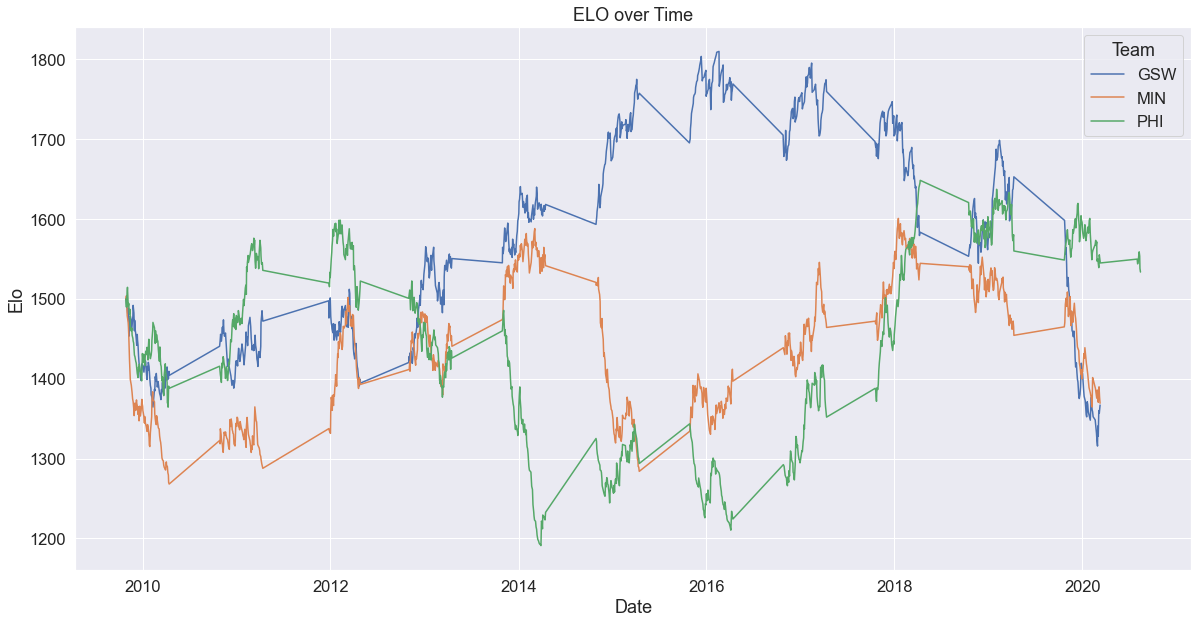

In [77]:
%matplotlib inline
import random

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
'''
for index, row in dataset.sample(frac=0.2).iterrows():
  sns.lineplot(data=row, x=dates, y=row.values)

plt.set(xlabel="Dates")
'''
elos = teams_elo_df_basic['Elo'].values
#teams_elo_df['Elo_moving_average'] = runningMeanFast(elos, 15)
plt.figure(figsize=(20,10))
sample_teams = random.sample(list(teams), k=3)
sns.set(font_scale=1.5)
sampled_data = teams_elo_df_basic.loc[teams_elo_df_basic['Team'].isin(sample_teams)]
sns.lineplot(data=sampled_data, x='Date', y='Elo', hue='Team')
plt.title("ELO over Time")

# Average out the stats of teams for last 10 games for BASIC STATS

In [78]:
def get_avg_home_last_n_games(team, game_date, stats_season, n) :
    prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
    
    h_df = prev_game_df.filter(regex='_H$', axis=1)
    
    h_df.fillna(1)

    return h_df.mean()

In [79]:
def get_avg_away_last_n_games(team, game_date, stats_season, n) :
    prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_A'] == team)].sort_values(by = 'Date').tail(n)
    
    
    a_df = prev_game_df.filter(regex='_A$', axis=1)
    

    a_df.fillna(1)

    return a_df.mean()

In [80]:
last_10_basic = pd.DataFrame()


for season in basic_full_df['Season'].unique() :
    l = ['Game_ID', 'Date', 'Season'] 
    other = list(basic_full_df.columns[4:33])  
    cols = l + other 

    season_team_stats = basic_full_df[basic_full_df['Season'] == season].sort_values(by = 'Date')[cols].reset_index(drop = True)

    season_recent_performance_df = pd.DataFrame()
    
    for index, row in season_team_stats.iterrows() : 
        game_id = row['Game_ID']
        game_date = row['Date']
        h_team = row['Team_H']
        a_team = row['Team_A']
        
        h_team_recent_performance = get_avg_home_last_n_games(h_team, game_date, season_team_stats, 10)
        h_team_recent_performance.index = ['H_Last_10_Avg_' + x for x in h_team_recent_performance.index]
       
        
        a_team_recent_performance = get_avg_away_last_n_games(a_team, game_date, season_team_stats, 10)
        a_team_recent_performance.index = ['A_Last_10_Avg_' + x for x in a_team_recent_performance.index]  
        
        new_row = pd.concat([h_team_recent_performance, a_team_recent_performance], sort=False)
        new_row['Game_ID'] = game_id
        
        season_recent_performance_df = season_recent_performance_df.append(new_row, ignore_index=True)
        season_recent_performance_df = season_recent_performance_df[new_row.index]


    last_10_basic = pd.concat([last_10_basic, season_recent_performance_df])

<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:

In [81]:
last_10_basic.dropna(inplace=True)

In [101]:
elo_df_basic.head()


,Game_ID,Team_H,Team_A,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,0,DAL,WAS,1500,1500,1486.830104,1513.169896
1,2,POR,HOU,1500,1500,1507.825731,1492.174269
2,4,CLE,BOS,1500,1500,1490.751444,1509.248556
3,6,LAL,LAC,1500,1500,1506.763631,1493.236369
4,31,GSW,HOU,1500,1492.17,1495.047615,1497.126654


In [102]:
# Cast H_Team_ELO_Before and After as Floats instead of Objects

elo_df_basic['H_Team_Elo_Before'] = elo_df_basic['H_Team_Elo_Before'].astype(float)
elo_df_basic['A_Team_Elo_Before'] = elo_df_basic['A_Team_Elo_Before'].astype(float)

In [103]:
all_basic_stats = basic_full_df.iloc[0:, [0,1,2,3,4,5,19,20]].merge(elo_df_basic.drop(columns=['Team_H', 'Team_A']),\
                                                        on='Game_ID').merge(last_10_basic, on = 'Game_ID')



In [110]:
# Drop the 'Win' column

all_basic_stats.drop(columns='Win', inplace=True)

In [111]:
all_basic_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12696 entries, 0 to 12695
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Game_ID                 12696 non-null  object        
 1   Date                    12696 non-null  datetime64[ns]
 2   Season                  12696 non-null  int64         
 3   Team_H                  12696 non-null  object        
 4   Points_H                12696 non-null  float64       
 5   Team_A                  12696 non-null  object        
 6   Points_A                12696 non-null  float64       
 7   H_Team_Elo_Before       12696 non-null  float64       
 8   A_Team_Elo_Before       12696 non-null  float64       
 9   H_Team_Elo_After        12696 non-null  float64       
 10  A_Team_Elo_After        12696 non-null  float64       
 11  H_Last_10_Avg_Points_H  12696 non-null  float64       
 12  H_Last_10_Avg_FG_H      12696 non-null  float6

In [85]:
# Check out to make sure there aren't any more duplicates
all_basic_stats[all_basic_stats['Team_H']=='PHO'].tail(5)

,Game_ID,Date,Season,Team_H,Points_H,Team_A,Points_A,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,H_Last_10_Avg_Points_H,H_Last_10_Avg_FG_H,H_Last_10_Avg_FGA_H,H_Last_10_Avg_2P_H,H_Last_10_Avg_2PA_H,H_Last_10_Avg_3P_H,H_Last_10_Avg_3PA_H,H_Last_10_Avg_FT_H,H_Last_10_Avg_FTA_H,H_Last_10_Avg_ORB_H,H_Last_10_Avg_TRB_H,H_Last_10_Avg_AST_H,H_Last_10_Avg_STL_H,H_Last_10_Avg_BLK_H,A_Last_10_Avg_Points_A,A_Last_10_Avg_FG_A,A_Last_10_Avg_FGA_A,A_Last_10_Avg_2P_A,A_Last_10_Avg_2PA_A,A_Last_10_Avg_3P_A,A_Last_10_Avg_3PA_A,A_Last_10_Avg_FT_A,A_Last_10_Avg_FTA_A,A_Last_10_Avg_ORB_A,A_Last_10_Avg_TRB_A,A_Last_10_Avg_AST_A,A_Last_10_Avg_STL_A
12582,26023,2020-03-08,2020,PHO,140.0,MIL,131.0,1449.94,1737.14,1469.613771,1717.469459,108.4,38.6,83.6,27.1,52.5,11.5,31.1,19.7,22.2,9.7,42.4,25.5,7.9,4.9,111.4,40.6,89.8,29.0,53.0,11.6,36.8,18.6,23.5,8.9,50.5,23.8,8.0
12626,26097,2020-08-02,2020,PHO,117.0,DAL,115.0,1470.98,1575.67,1476.791336,1569.852988,113.7,40.3,83.7,27.3,50.3,13.0,33.4,20.1,22.7,9.6,42.7,27.2,7.8,5.0,112.9,40.7,87.7,24.9,45.4,15.8,42.3,15.7,19.9,8.7,46.4,25.2,6.4
12650,26144,2020-08-06,2020,PHO,114.0,IND,99.0,1485.58,1578.8,1501.139492,1563.235332,114.7,40.9,85.4,27.6,51.1,13.3,34.3,19.6,22.1,9.1,43.6,27.4,7.7,4.8,109.4,41.4,87.5,31.3,59.5,10.1,28.0,16.5,20.5,8.4,41.7,24.4,8.2
12673,26188,2020-08-10,2020,PHO,128.0,OKC,101.0,1513.31,1607.85,1536.833464,1584.328358,113.4,40.9,86.9,28.2,52.3,12.7,34.6,18.9,21.4,9.3,43.8,27.2,7.3,4.3,110.6,40.3,87.0,29.8,56.6,10.5,30.4,19.5,24.6,7.4,39.7,22.8,10.0
12690,26225,2020-08-13,2020,PHO,128.0,DAL,102.0,1552.25,1572.84,1569.526972,1555.565683,115.4,41.3,87.1,27.8,52.3,13.5,34.8,19.3,22.0,9.4,45.0,27.6,7.7,4.6,113.4,40.4,88.1,27.0,48.2,13.4,39.9,19.2,24.7,8.0,46.2,24.9,6.7


# Average out the stats of teams for last 10 games for ADVANCED STATS

In [86]:
adv_full_df.head()

,Date,Season,Team_H,Team_A,Points_H,Points_A,Win,ORtg_H,Pace_H,FTr_H,3PAr_H,TS%_H,TRB%_H,AST%_H,STL%_H,BLK%_H,eFG%_H,ORB%_H,ORtg_A,Pace_A,FTr_A,3PAr_A,TS%_A,TRB%_A,AST%_A,STL%_A,BLK%_A,eFG%_A,ORB%_A,Game_ID
0,2009-10-27,2010,DAL,WAS,91.0,102.0,0,101.6,89.5,0.447,0.237,0.500,47.7,53.3,6.7,12.7,0.421,22.9,113.9,89.5,0.286,0.155,0.539,52.3,48.7,6.7,6.9,0.488,22.5,0
1,2009-10-27,2010,POR,HOU,96.0,87.0,1,99.4,96.6,0.286,0.273,0.554,60.7,69.7,9.3,19.0,0.494,34.3,90.1,96.6,0.358,0.222,0.464,39.3,60.0,12.4,3.6,0.401,20.4,1
2,2009-10-27,2010,CLE,BOS,89.0,95.0,0,100.4,88.6,0.457,0.243,0.529,45.7,58.6,7.9,17.0,0.457,15.8,107.2,88.6,0.361,0.264,0.569,54.3,62.5,10.2,15.1,0.507,18.8,2
3,2009-10-27,2010,LAL,LAC,99.0,92.0,1,101.6,97.5,0.435,0.200,0.489,48.0,48.6,13.3,5.6,0.435,32.1,94.4,97.5,0.184,0.172,0.489,52.0,69.2,10.3,5.9,0.466,33.3,3
4,2009-10-28,2010,ATL,IND,120.0,109.0,1,119.0,100.8,0.333,0.138,0.601,46.7,65.2,15.9,10.9,0.569,19.0,108.1,100.8,0.342,0.247,0.649,53.3,59.0,1.0,5.3,0.603,18.2,4


## Make ELO DF for advanced DF

In [87]:
adv_full_df.sort_values(by = 'Date', inplace = True)
adv_full_df.reset_index(inplace=True, drop = True)
elo_df_adv = pd.DataFrame(columns=['Game_ID', 'Team_H', 'Team_A', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df_adv = pd.DataFrame(columns=['Game_ID','Team', 'Elo', 'Date', 'Where_Played', 'Season']) 

for index, row in adv_full_df.iterrows(): 
    game_id = row['Game_ID']
    game_date = row['Date']
    season = row['Season']
    h_team, a_team = row['Team_H'], row['Team_A']
    h_score, a_score = row['Points_H'], row['Points_A'] 

    if (h_team not in elo_df_adv['Team_H'].values and h_team not in elo_df_adv['Team_A'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, adv_full_df, elo_df_adv)

    if (a_team not in elo_df_adv['Team_H'].values and a_team not in elo_df_adv['Team_A'].values) :
        a_team_elo_before = 1500
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, adv_full_df, elo_df_adv)

    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)

    new_row = {'Game_ID': game_id, 'Team_H': h_team, 'Team_A': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'Game_ID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'Season': season}
    teams_row_two = {'Game_ID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'Season': season}
  
    elo_df_adv = elo_df_adv.append(new_row, ignore_index = True)
    teams_elo_df_adv = teams_elo_df_basic.append(teams_row_one, ignore_index=True)
    teams_elo_df_adv = teams_elo_df_basic.append(teams_row_two, ignore_index=True)
    

<ipython-input-67-14c16f075466>:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['Team_H'] == team) | (team_stats['Team_A'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [88]:
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df_adv["Date"]]))
dates = sorted(dates, key=lambda x: time.strptime(x, '%m-%d-%Y'))
teams = adv_full_df["Team_A"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df_adv.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo
teams_elo_df_adv['Elo'] = teams_elo_df_adv['Elo'].astype(float)

In [89]:
elo_df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13118 entries, 0 to 13117
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game_ID            13118 non-null  object 
 1   Team_H             13118 non-null  object 
 2   Team_A             13118 non-null  object 
 3   H_Team_Elo_Before  13118 non-null  object 
 4   A_Team_Elo_Before  13118 non-null  object 
 5   H_Team_Elo_After   13118 non-null  float64
 6   A_Team_Elo_After   13118 non-null  float64
dtypes: float64(2), object(5)
memory usage: 717.5+ KB


## Last 10 games average for Advanced DF

In [90]:
# Reorder the columns
adv_full_df = adv_full_df[['Game_ID', 'Date', 'Season', 'Win', 'Team_H', 'Points_H', 'ORtg_H', 'Pace_H', 'FTr_H', \
                 '3PAr_H', 'TS%_H', 'TRB%_H','AST%_H', 'STL%_H', 'BLK%_H', 'eFG%_H', 'ORB%_H',\
                 'Team_A', 'Points_A', 'ORtg_A', 'Pace_A', 'FTr_A', \
                 '3PAr_A', 'TS%_A', 'TRB%_A','AST%_A', 'STL%_A', 'BLK%_A', 'eFG%_A', 'ORB%_A']]

In [91]:
adv_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13118 entries, 0 to 13117
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Game_ID   13118 non-null  int64         
 1   Date      13118 non-null  datetime64[ns]
 2   Season    13118 non-null  int64         
 3   Win       13118 non-null  int64         
 4   Team_H    13118 non-null  object        
 5   Points_H  13118 non-null  float64       
 6   ORtg_H    13118 non-null  float64       
 7   Pace_H    13118 non-null  float64       
 8   FTr_H     13118 non-null  float64       
 9   3PAr_H    13118 non-null  float64       
 10  TS%_H     13118 non-null  float64       
 11  TRB%_H    13118 non-null  float64       
 12  AST%_H    13118 non-null  float64       
 13  STL%_H    13118 non-null  float64       
 14  BLK%_H    13118 non-null  float64       
 15  eFG%_H    13118 non-null  float64       
 16  ORB%_H    13118 non-null  float64       
 17  Team_A    13

In [92]:
last_10_adv = pd.DataFrame()


for season in adv_full_df['Season'].unique() :
    l = ['Game_ID', 'Date', 'Season'] 
    other = list(adv_full_df.columns[4:29])  
    cols = l + other 

    stats_season = adv_full_df[adv_full_df['Season'] == season].sort_values(by = 'Date')[cols].reset_index(drop = True)

    season_recent_performance_df = pd.DataFrame()
    
    for index, row in stats_season.iterrows() : 
        game_id = row['Game_ID']
        game_date = row['Date']
        h_team = row['Team_H']
        a_team = row['Team_A']
        
        h_team_recent_performance = get_avg_home_last_n_games(h_team, game_date, stats_season, 10)
        h_team_recent_performance.index = ['H_Last_10_Avg_' + x for x in h_team_recent_performance.index]

        a_team_recent_performance = get_avg_away_last_n_games(a_team, game_date, stats_season, 10)
        a_team_recent_performance.index = ['A_Last_10_Avg_' + x for x in a_team_recent_performance.index]  
  
        new_row = pd.concat([h_team_recent_performance, a_team_recent_performance], sort=False)
        new_row['Game_ID'] = game_id
        
        season_recent_performance_df = season_recent_performance_df.append(new_row, ignore_index=True)
        season_recent_performance_df = season_recent_performance_df[new_row.index]


    last_10_adv = pd.concat([last_10_adv, season_recent_performance_df])

<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game_df = stats_season[stats_season['Date'] < game_date][(stats_season['Team_H'] == team)].sort_values(by = 'Date').tail(n)
<ipython-input-78-6ca18cc87061>:

In [93]:
last_10_adv.dropna()

,H_Last_10_Avg_Points_H,H_Last_10_Avg_ORtg_H,H_Last_10_Avg_Pace_H,H_Last_10_Avg_FTr_H,H_Last_10_Avg_3PAr_H,H_Last_10_Avg_TS%_H,H_Last_10_Avg_TRB%_H,H_Last_10_Avg_AST%_H,H_Last_10_Avg_STL%_H,H_Last_10_Avg_BLK%_H,H_Last_10_Avg_eFG%_H,H_Last_10_Avg_ORB%_H,A_Last_10_Avg_Points_A,A_Last_10_Avg_ORtg_A,A_Last_10_Avg_Pace_A,A_Last_10_Avg_FTr_A,A_Last_10_Avg_3PAr_A,A_Last_10_Avg_TS%_A,A_Last_10_Avg_TRB%_A,A_Last_10_Avg_AST%_A,A_Last_10_Avg_STL%_A,A_Last_10_Avg_BLK%_A,A_Last_10_Avg_eFG%_A,Game_ID
19,95.0,96.90,98.00,0.3760,0.0750,0.4380,49.00,41.20,15.30,2.70,0.3710,32.10,91.0,94.00,96.80,0.4460,0.2650,0.4580,50.50,65.50,4.10,3.40,0.4040,24.0
24,120.0,119.00,100.80,0.3330,0.1380,0.6010,46.70,65.20,15.90,10.90,0.5690,19.00,102.0,113.90,89.50,0.2860,0.1550,0.5390,52.30,48.70,6.70,6.90,0.4880,29.0
32,113.0,123.70,91.30,0.2330,0.2790,0.5960,56.00,64.40,4.40,0.00,0.5760,28.20,90.5,102.60,88.20,0.2810,0.2265,0.4630,51.05,49.45,7.40,6.70,0.4175,37.0
36,89.0,100.40,88.60,0.4570,0.2430,0.5290,45.70,58.60,7.90,17.00,0.4570,15.80,59.0,69.10,85.40,0.3380,0.1350,0.3470,51.10,43.50,7.00,8.50,0.3110,32.0
37,107.0,113.30,94.50,0.3510,0.1690,0.6020,49.30,62.80,9.50,10.80,0.5970,21.20,94.0,103.30,91.00,0.4160,0.1950,0.5160,53.50,59.40,6.60,5.20,0.4480,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,114.5,113.96,100.22,0.2896,0.4110,0.5741,53.45,63.84,5.44,6.05,0.5362,23.67,118.2,118.54,99.79,0.2221,0.3762,0.5831,49.10,49.51,7.09,8.23,0.5505,13110.0
1055,114.5,115.08,99.51,0.2140,0.3295,0.5966,47.73,60.62,7.84,9.71,0.5676,18.21,112.6,111.36,100.10,0.3018,0.4391,0.5835,49.93,70.64,8.62,11.23,0.5405,13115.0
1056,119.5,120.39,99.37,0.3142,0.4049,0.6055,51.16,60.57,6.02,6.83,0.5621,21.43,108.7,109.12,100.06,0.2908,0.3532,0.5580,45.34,55.45,10.15,8.52,0.5160,13116.0
1057,115.7,111.81,103.57,0.3134,0.5406,0.5828,44.01,54.82,9.38,9.88,0.5358,15.78,111.8,113.23,98.92,0.2163,0.3912,0.5566,49.77,58.16,8.21,6.88,0.5297,13114.0


In [104]:
# Cast H_Team_ELO_Before and After as Floats instead of Objects

elo_df_adv['H_Team_Elo_Before'] = elo_df_adv['H_Team_Elo_Before'].astype(float)
elo_df_adv['A_Team_Elo_Before'] = elo_df_adv['A_Team_Elo_Before'].astype(float)

In [131]:
all_adv_stats = adv_full_df.iloc[0:, [0,1,2,3,4,5,17,18]].merge(elo_df_adv.drop(columns=['Team_H', 'Team_A']),\
                                                        on='Game_ID').merge(last_10_adv, on = 'Game_ID')

In [132]:
all_adv_stats.shape

(13118, 35)

In [133]:
all_adv_stats.dropna(inplace=True)

In [134]:
# Drop the 'Win' column

all_adv_stats.drop(columns='Win', inplace=True)

In [135]:
all_adv_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12696 entries, 20 to 13117
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Game_ID                 12696 non-null  object        
 1   Date                    12696 non-null  datetime64[ns]
 2   Season                  12696 non-null  int64         
 3   Team_H                  12696 non-null  object        
 4   Points_H                12696 non-null  float64       
 5   Team_A                  12696 non-null  object        
 6   Points_A                12696 non-null  float64       
 7   H_Team_Elo_Before       12696 non-null  float64       
 8   A_Team_Elo_Before       12696 non-null  float64       
 9   H_Team_Elo_After        12696 non-null  float64       
 10  A_Team_Elo_After        12696 non-null  float64       
 11  H_Last_10_Avg_Points_H  12696 non-null  float64       
 12  H_Last_10_Avg_ORtg_H    12696 non-null  float

# EDA

## Covariance matrix for metrics in both DFs

In [136]:
# Create a df for the covariance matrix, without date and opponent
covariance_basic = all_basic_stats.drop(columns=['Date', 'Team_A', 'Season',\
                                                  'Team_H', 'Game_ID'])

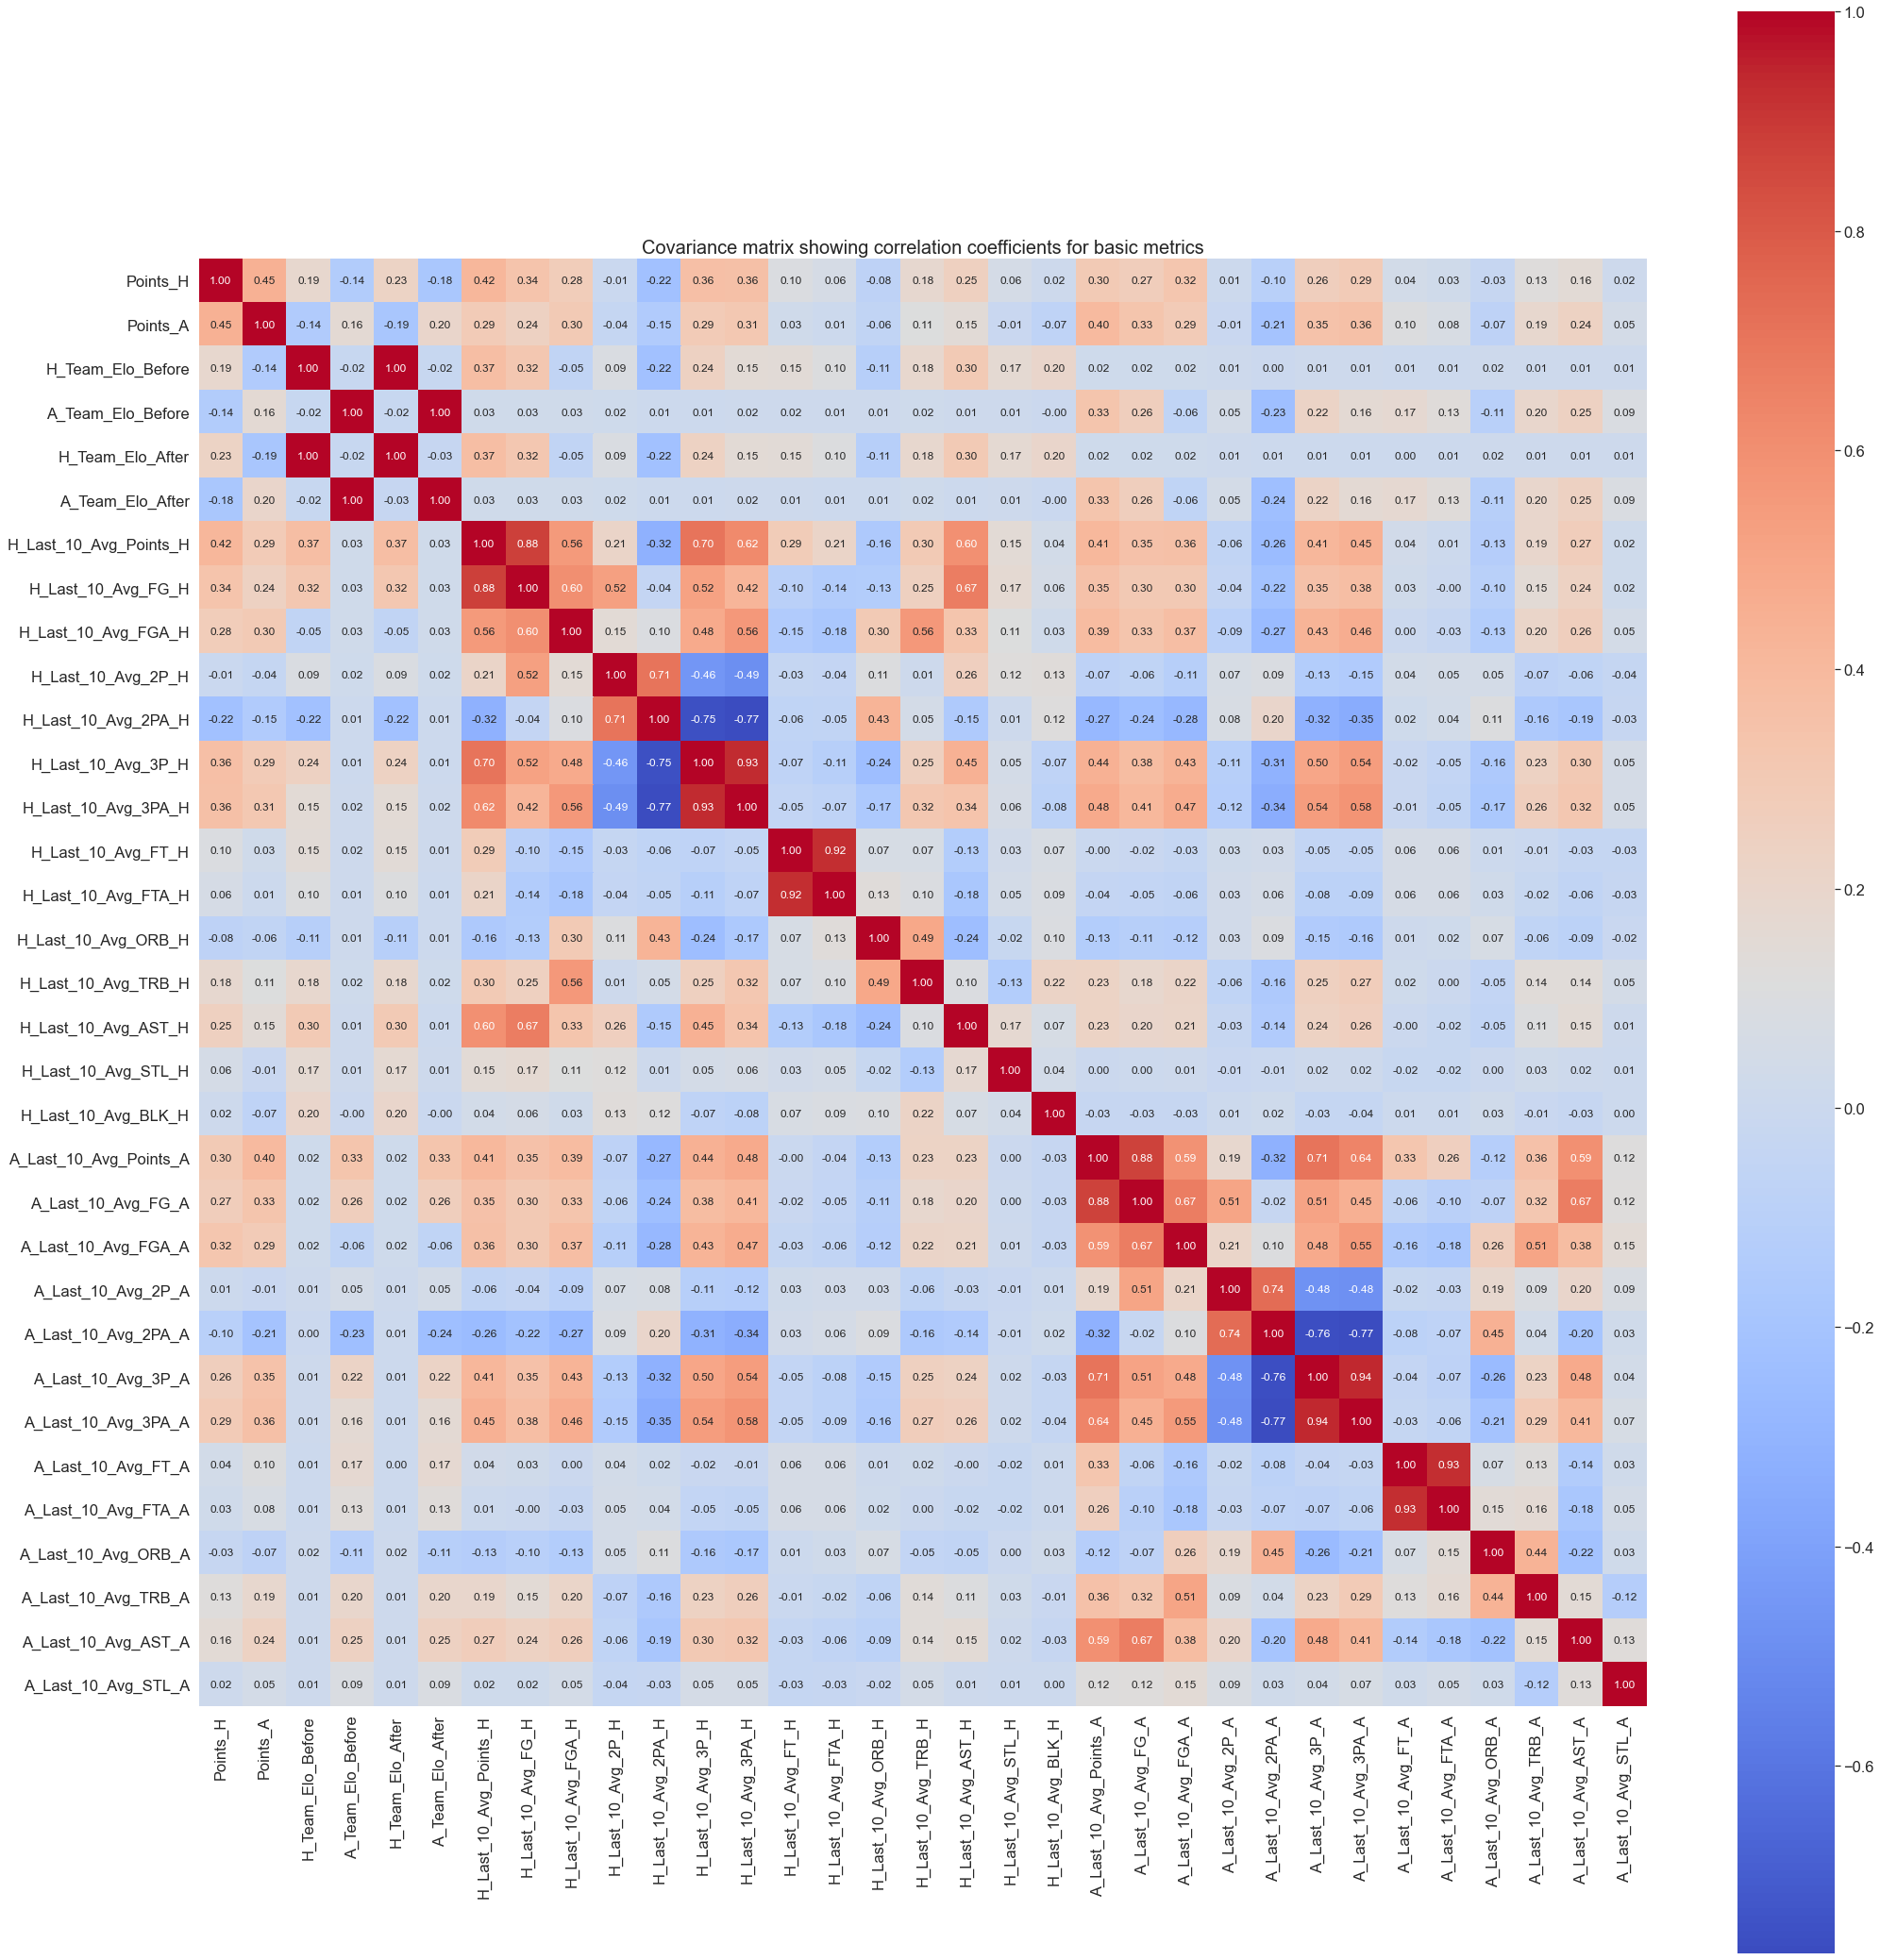

In [137]:
# Basic covariance matrix
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(covariance_basic.values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=covariance_basic.columns,
                 xticklabels=covariance_basic.columns)
plt.title('Covariance matrix showing correlation coefficients for basic metrics', size = 20)
plt.tight_layout()
plt.show()

In [138]:
# Create a df for the covariance matrix, without date and opponent
covariance_advanced = all_adv_stats.drop(columns=['Date', 'Team_A', 'Season',\
                                                  'Team_H', 'Game_ID'])

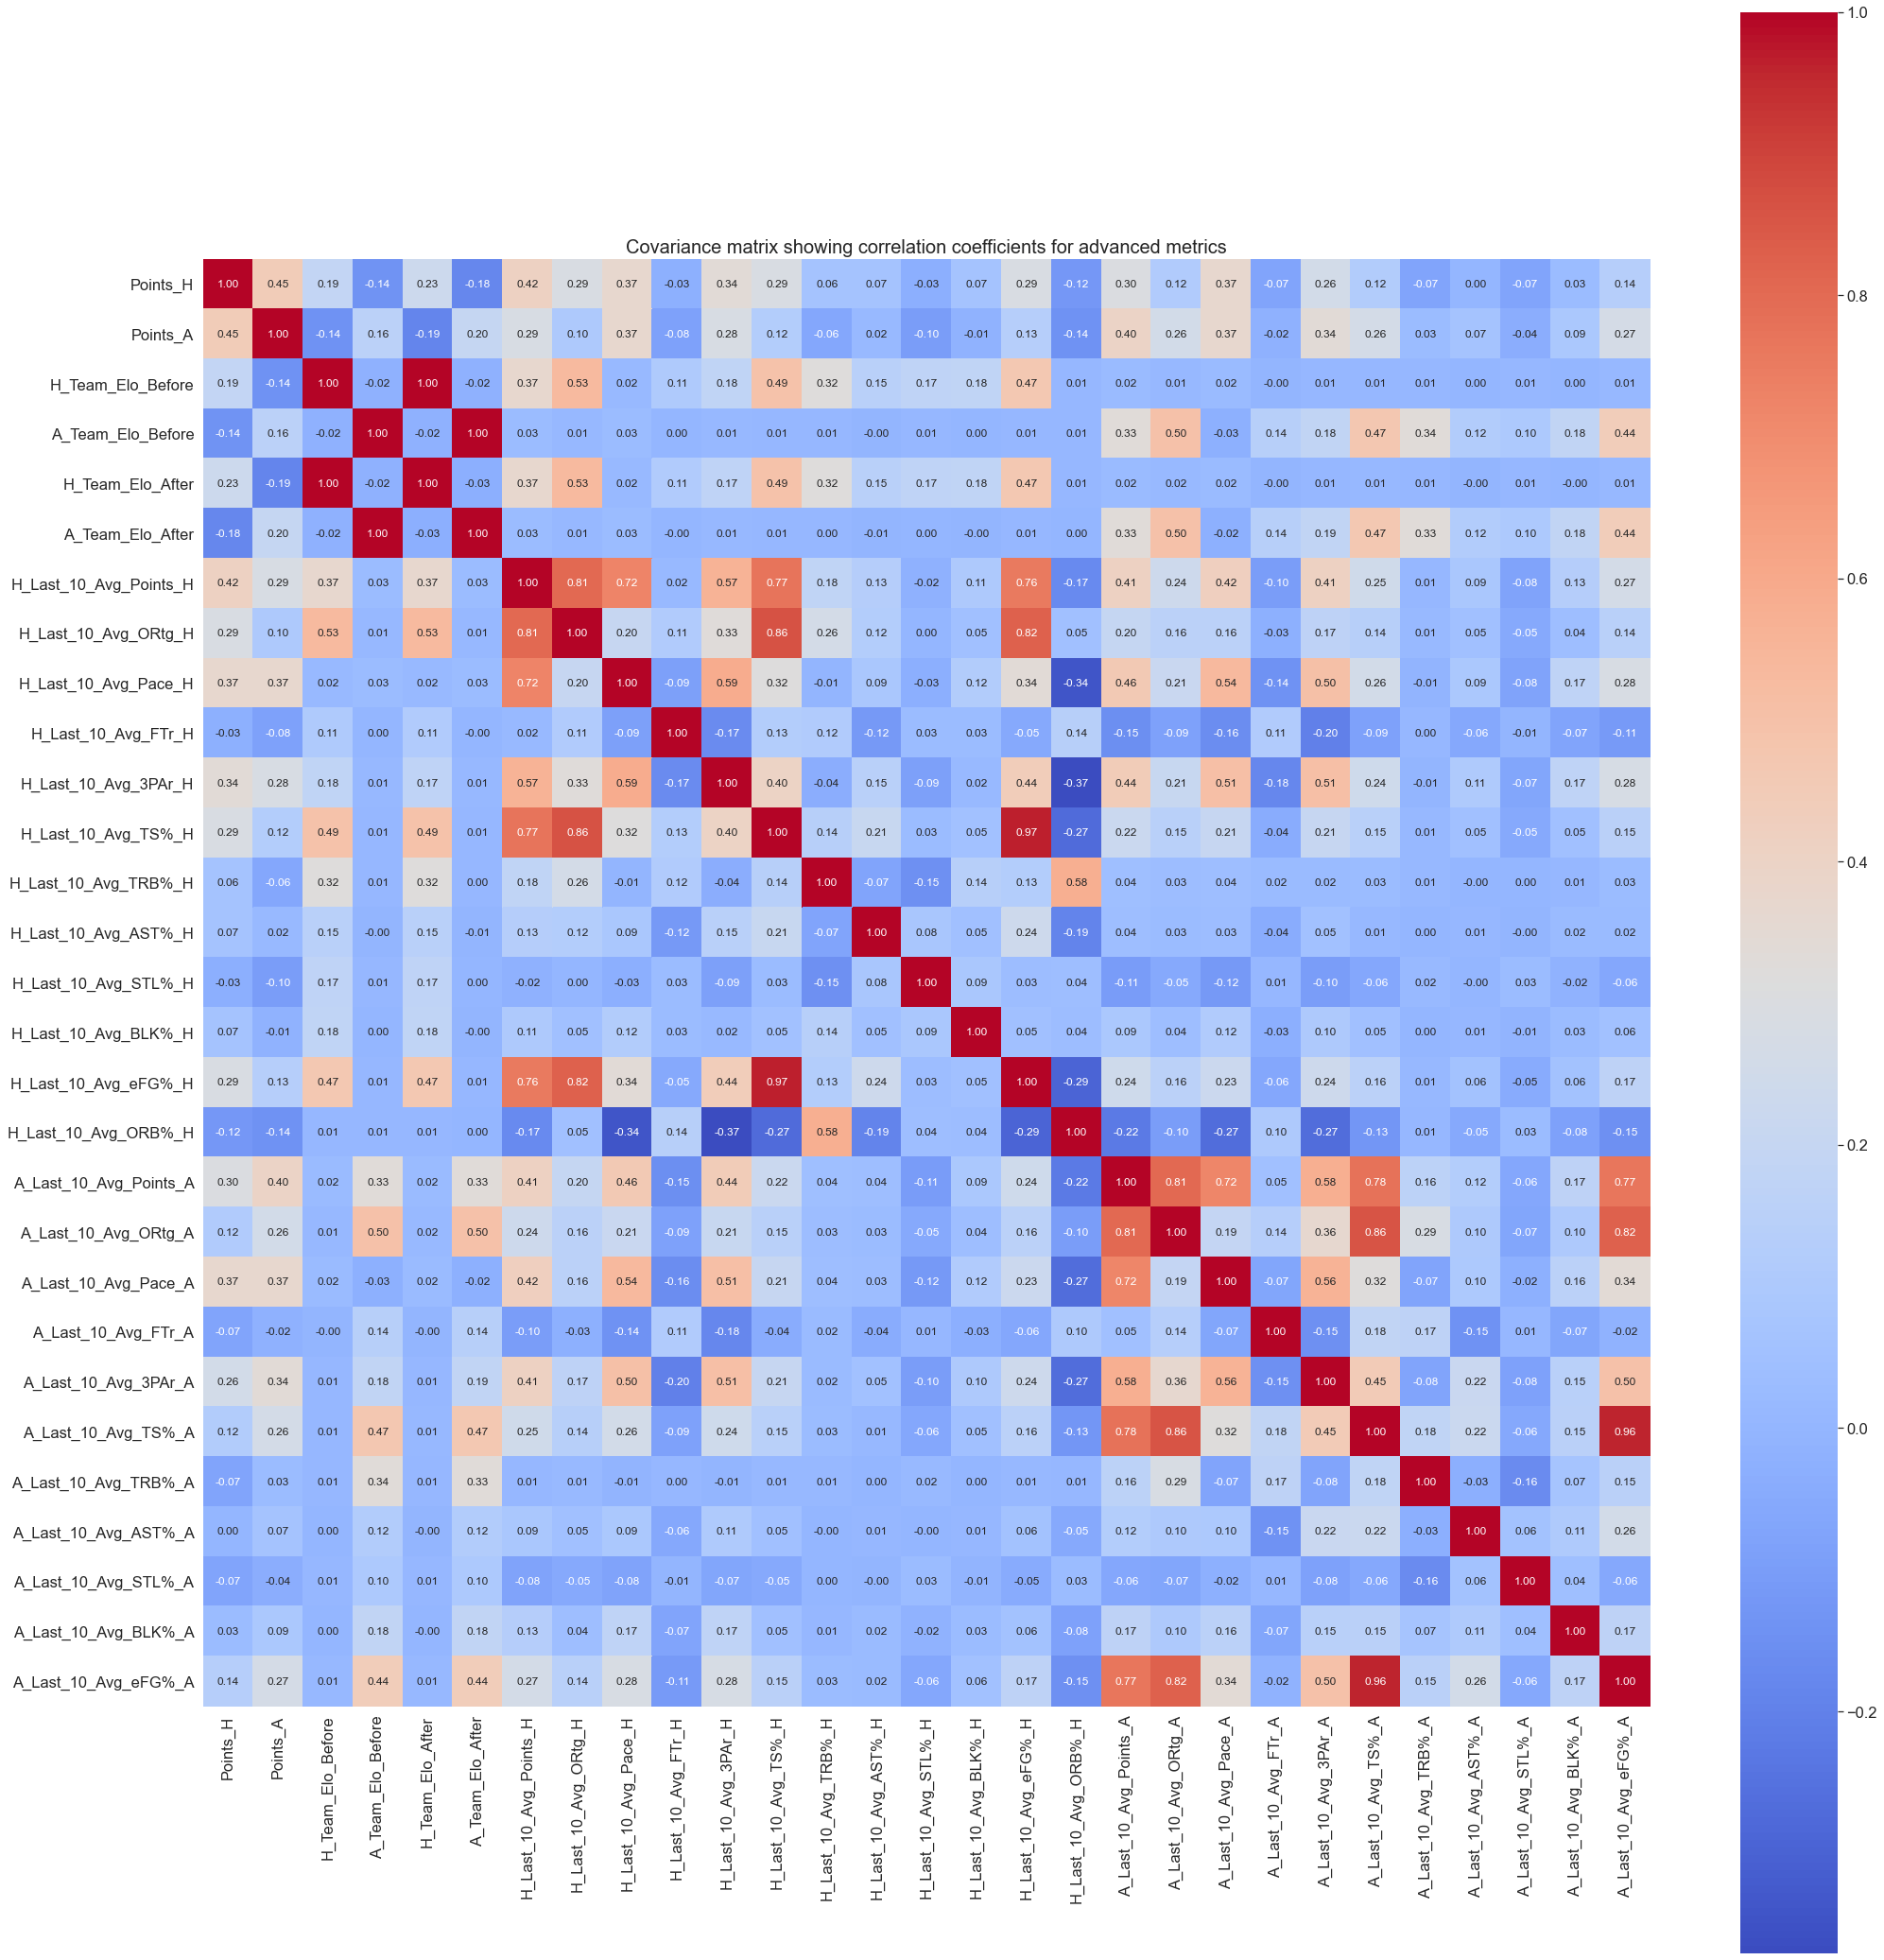

In [116]:
# Advanced covariance matrix

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(covariance_advanced.values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=covariance_advanced.columns,
                 xticklabels=covariance_advanced.columns)
plt.title('Covariance matrix showing correlation coefficients for advanced metrics', size = 20)
plt.tight_layout()
plt.show()

In [ ]:
all_adv_stats['H_Team_Elo_Before'].isna().sum()

In [ ]:
all_adv_stats.reset_index(inplace=True)

In [ ]:
all_adv_stats.drop(columns='index')

# Modeling

## Run vanilla classifier models

In [119]:
all_adv_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12696 entries, 20 to 13117
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Game_ID                 12696 non-null  object        
 1   Date                    12696 non-null  datetime64[ns]
 2   Season                  12696 non-null  int64         
 3   Team_H                  12696 non-null  object        
 4   Team_A                  12696 non-null  object        
 5   H_Team_Elo_Before       12696 non-null  float64       
 6   A_Team_Elo_Before       12696 non-null  float64       
 7   H_Team_Elo_After        12696 non-null  float64       
 8   A_Team_Elo_After        12696 non-null  float64       
 9   H_Last_10_Avg_Points_H  12696 non-null  float64       
 10  H_Last_10_Avg_ORtg_H    12696 non-null  float64       
 11  H_Last_10_Avg_Pace_H    12696 non-null  float64       
 12  H_Last_10_Avg_FTr_H     12696 non-null  float

In [139]:
# Create column called "Label" for the winner of the game

all_adv_stats['Label'] = [1 if x > 0 else 0 for x in all_adv_stats['Points_H'] - all_adv_stats['Points_A']]
all_adv_stats.drop(columns=['Points_H', 'Points_A', 'A_Team_Elo_After', 'H_Team_Elo_After'], inplace=True)
all_adv_stats = all_adv_stats.dropna()

In [140]:
# Create features and leabels for data

cols = [0,1,2,3,4]
all_adv_stats.drop(all_adv_stats.columns[cols],axis=1, inplace=True)

features = all_adv_stats.drop(columns = 'Label')
label = all_adv_stats['Label']

In [141]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

In [147]:
# instantiate classifiers for vanilla models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
    'XGBoost' : XGBClassifier()
}

In [148]:
# Create DataFrame to hold results from vanilla models

from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve


results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    # fit models
    value.fit(x_train, y_train)
    train_pred = value.predict(x_train)
    y_pred = value.predict(x_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    # get false neg and true positive
    # add to confusion matrices list to view later if desired
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    conf_matrices.append(cm)
    
    # add measurements to datafram
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
results.sort_values(by= ['F1_score'], ascending= False)

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
Logistic Regression,67.09,67.48,0.74,310.0,1176.0
Support Vector Machine,67.02,66.89,0.74,283.0,1203.0
Random Forest,100.00,65.75,0.73,334.0,1152.0
XGBoost,95.89,64.92,0.71,380.0,1106.0
K-Nearest Neighbors,74.73,63.15,0.69,428.0,1058.0
Decision Tree,100.00,58.35,0.64,546.0,940.0


## Check out the feature importances for Decision Tree

In [158]:
#Construct a decision tree
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
d_tree.feature_importances_

array([0.12521674, 0.1029915 , 0.03527823, 0.0309532 , 0.02560675,
       0.04119974, 0.03411119, 0.02407874, 0.04240638, 0.04676875,
       0.03939222, 0.03098119, 0.02341209, 0.0334193 , 0.02364117,
       0.03448573, 0.03232563, 0.03159006, 0.03845203, 0.02519423,
       0.04017851, 0.04237313, 0.03726495, 0.03373016, 0.02494839])

<AxesSubplot:>

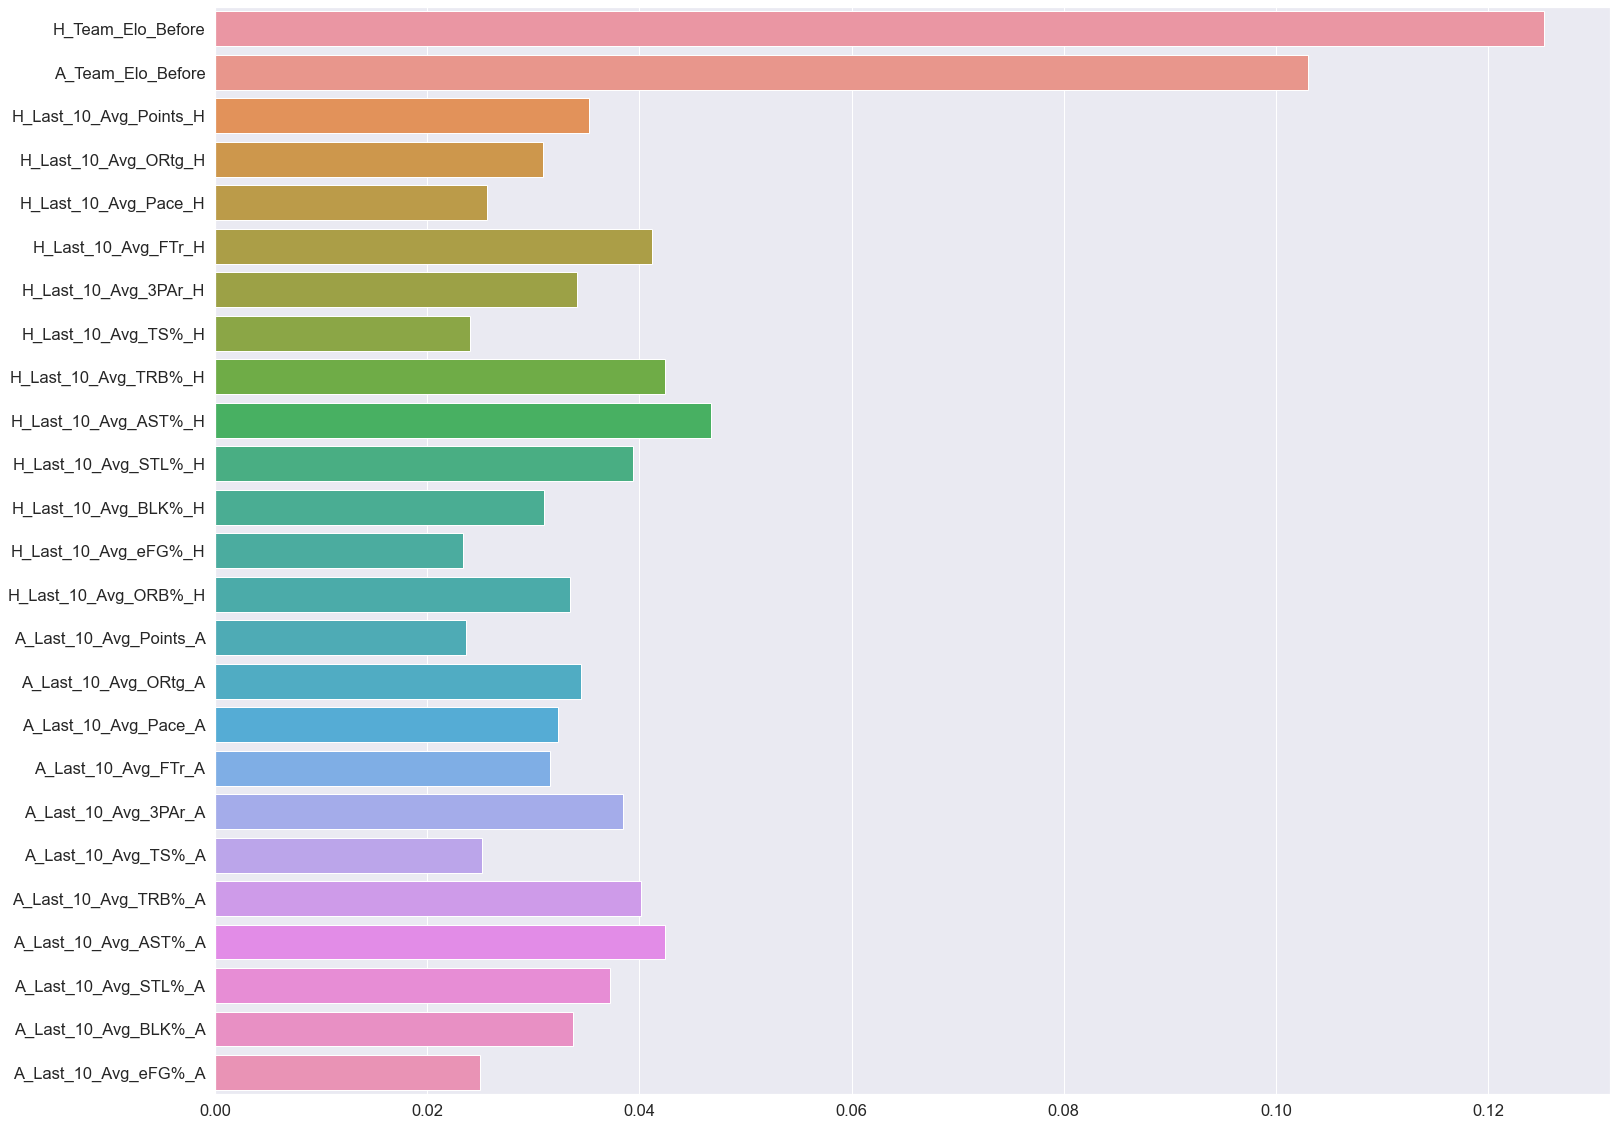

In [159]:
# Check out the feature importances
plt.figure(figsize=(25,20))
sns.barplot(x=d_tree.feature_importances_, y=features.columns)

## Do some hyperparameter tuning

In [160]:
# Function to get results after each model

def get_results(model, model_name):
    train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, x_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

## Check best parameters for Logistic Regression

In [175]:
# Instantiate classifier
log_reg = LogisticRegression(max_iter=140, verbose=2, random_state=42)

In [185]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set parameter criteria
param_grid_log = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [42]
}

# Instantiate Grid Search
GS_log_reg = GridSearchCV(log_reg, param_grid_log, scoring= 'accuracy')

In [186]:
# Fit model

GS_log_reg.fit(x_train, y_train)

/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warn

/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

GridSearchCV(estimator=LogisticRegression(max_iter=140, random_state=42,
                                          verbose=2),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='accuracy')

In [187]:
GS_log_reg.best_params_

{'C': 0.05, 'class_weight': None, 'penalty': 'l2', 'random_state': 42}

GS Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1054
           1       0.69      0.79      0.74      1486

    accuracy                           0.67      2540
   macro avg       0.66      0.65      0.65      2540
weighted avg       0.67      0.67      0.67      2540



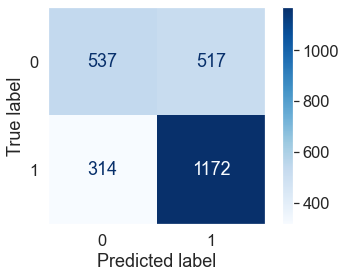

In [188]:
# See model results and add to results df
get_results(GS_log_reg, 'GS Logistic Regression')

## Best parameters for SVM